#Problem 2
*   Apply only **logistic regression** for the **Ekush** dataset and build a binary classification model that can predict  **male/female** from Bengali handwritten digits with different hyperparameter settings.  

**Logistic regression** in machine learning is a type of algorithm which uses logistic function. It is named for this function used at the core of the method. The main goal of logistic regression is to **minimize the error between its predictions and training data**.

 It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1 or -1 and 1, but never exactly at those limits. The following code shows the shape of the function within the range -5 to 5.

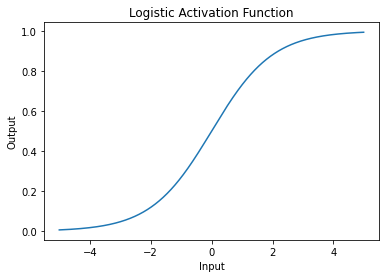

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(-5, 5, 0.01)
y = 1 / (1 + np.exp(-x))
plt.plot(x,y)
plt.title('Logistic Activation Function')
plt.xlabel('Input')
plt.ylabel('Output');

The dataset we'll be using is **Ekush** dataset, a dataset which contains pixel value of about 30,830 images along with different informations. It contains information about male and female handwritten letters which will help to do detect the male and female writing which is a binary classification problem.

<div align="center">
<img src="https://drive.google.com/uc?id=1GhuJfYchOjfNoBtwkpWivPRQinegMYwy" width="600">
</div>

**Dataset Link:** https://shahariarrabby.github.io/ekush/#home







**Data Processing**

Let's start by importing all of the modules we'll need. The main ones we need to import are:
- os  module provides a portable way of using operating system dependent functionality along with the directories
- shutil module helps to handle high-level file and directory.
- numpy helps to handle data in a more efficient way by creating numpy arrays.
- Pandas library helps to read the csv file contents.
- Tensor creates multi-dimensional matrix containing elements of a single data type.
- torch for general PyTorch functionality
- torch.nn and torch.nn.functional for neural network based functions
- torch vision is a part of PyTorch which consists of popular datasets,model, architectures and frequently used for image transformation.
- torchvision.transforms for data augmentation.
- torchvision.datasets for loading the dataset
- torch.optim for our optimizer which will update the parameters of our neural network
- torch.utils.data and torch.utils.data.sampler for handling the dataset  
- matplotlib for plotting
- PIL is python imaging library used to handle images.

In [2]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
from torch import tensor

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

###Loading and Preparing the dataset

In order to read the data stored in google drive we have to at first mount the google drive with colab. The following cells shows how to mount with it.

In [3]:
from google.colab import drive
drive.flush_and_unmount()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Define the path of the directory file where it is stored

In [ ]:
# Path to the directory where the data is stored 
path = "/content/drive/MyDrive/4.2/sc/"
os.listdir(path)

['archive.zip',
 'dataset',
 'numta_logistic.pkl',
 'maleDigits.csv',
 'femaleDigits.csv',
 'numta_logistic1.pkl',
 'numta_logistic40.pkl',
 'numta_logistic37.pkl',
 'Capture2.JPG',
 'dataset.JPG',
 'numta_logistic38128.pkl',
 'numta_logistic31.pkl',
 'numta_logistic128_39.pkl']

Two csv files are read which contains the pixels and labels of each image.

*   **Csv file containing all the female written digits**
*   **Csv file containing all the male written digits**



In [ ]:
female_csv =  pd.read_csv('/content/drive/MyDrive/4.2/sc/femaleDigits.csv') 
male_csv =  pd.read_csv('/content/drive/MyDrive/4.2/sc/maleDigits.csv')

In [ ]:
female_csv.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,1,0,1,0,2,4,5,0,0,0,0,0,0,0,0,0,1,1,3,1,0,1,0,0,0,0,0,1,2,2,2,5,1,0,0,33,...,255,255,255,253,253,255,255,236,96,5,1,0,0,0,0,0,1,1,0,0,0,0,1,2,4,0,0,1,77,158,184,252,254,186,155,60,0,3,1,112
1,0,0,0,0,0,1,1,4,5,0,0,0,7,4,5,4,6,7,5,5,6,3,3,1,1,0,0,0,0,1,0,0,0,0,3,0,0,59,70,33,...,255,240,221,152,66,0,3,3,1,0,1,0,0,0,0,0,3,2,2,5,0,0,23,113,149,243,250,189,129,71,15,0,0,4,4,2,1,1,1,112
2,0,0,1,0,1,0,1,0,1,1,3,3,0,0,5,4,4,6,0,0,6,1,1,1,0,1,0,0,0,0,0,0,1,1,1,2,6,2,0,0,...,255,255,217,161,91,27,0,5,1,1,0,0,0,0,1,1,3,4,0,11,81,190,223,249,250,247,205,200,179,88,30,0,0,0,5,1,0,0,0,112
3,0,0,0,0,1,0,0,0,1,2,2,4,6,0,0,13,15,18,7,0,5,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,3,...,36,14,0,0,3,2,1,0,1,0,0,0,0,1,5,0,19,102,186,241,239,199,196,117,60,17,0,0,0,0,4,2,0,0,1,0,0,0,0,112
4,2,3,12,5,14,16,15,16,5,12,3,3,24,12,10,8,11,8,12,5,19,20,1,3,17,2,11,13,2,2,0,2,0,0,0,0,1,0,1,2,...,235,157,91,26,0,0,5,2,1,0,0,0,1,0,1,4,3,0,1,37,96,135,178,214,196,145,98,35,11,0,0,0,2,3,0,0,0,0,0,112


In [ ]:
male_csv.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,2,0,1,1,1,1,0,2,3,0,0,3,0,1,1,5,3,3,2,0,0,0,1,0,2,1,1,0,0,0,1,0,0,1,4,3,5,3,4,...,252,251,255,255,255,255,210,162,39,1,2,3,0,0,4,0,4,87,132,242,254,251,253,253,255,254,252,251,253,254,213,96,110,110,34,0,4,1,1,112
1,0,0,0,1,0,0,2,1,0,1,4,2,0,0,0,0,0,0,0,5,2,1,2,0,0,0,0,0,0,0,1,1,0,2,2,1,3,5,0,0,...,255,255,255,218,179,97,16,0,4,0,0,0,1,0,0,2,2,4,0,0,19,101,198,209,206,207,208,206,205,173,88,42,0,0,0,4,1,0,0,112
2,1,0,0,0,0,0,0,2,1,1,1,2,3,5,2,6,4,4,4,2,4,4,1,2,1,1,0,0,0,0,0,0,0,0,1,1,1,1,2,2,...,194,221,255,255,221,129,40,0,5,1,2,0,0,1,2,1,2,2,1,0,50,137,131,134,143,238,255,255,255,255,232,160,50,1,0,5,1,1,2,112
3,2,1,1,0,0,0,1,0,2,1,0,1,0,1,0,3,1,6,5,3,4,2,5,2,1,1,1,1,0,0,0,0,1,1,1,3,1,1,2,2,...,167,58,6,0,4,4,2,1,1,1,0,2,1,5,1,0,83,87,162,253,250,252,252,254,152,92,75,0,0,0,0,6,3,0,0,1,0,0,2,112
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,5,6,3,1,0,0,5,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,0,1,0,0,0,0,0,0,1,1,0,36,164,141,42,53,7,1,0,0,4,3,2,1,1,1,0,0,0,0,0,0,0,0,0,112


A **gender column** is added to both the csv files to make it a binary classification problem.


*  0 added to the female column
*  1 added to the male column

This will make it easier to distinguish between the 2 types.

In [ ]:
path='/content/drive/MyDrive/4.2/sc/'
def addColumn(csv_filename,label):
  df = pd.read_csv(path + csv_filename)
  df["gender"] = label
  df.to_csv("sample.csv", index=False)
  return df

In [ ]:
female_csv = addColumn('femaleDigits.csv',0)
male_csv =addColumn('maleDigits.csv',1)

In [ ]:
# printing all the column names to check if gender column is added

for col in female_csv.columns: 
    print(col) 
print("==============")
for col in male_csv.columns: 
    print(col) 

pixel0
pixel1
pixel2
pixel3
pixel4
pixel5
pixel6
pixel7
pixel8
pixel9
pixel10
pixel11
pixel12
pixel13
pixel14
pixel15
pixel16
pixel17
pixel18
pixel19
pixel20
pixel21
pixel22
pixel23
pixel24
pixel25
pixel26
pixel27
pixel28
pixel29
pixel30
pixel31
pixel32
pixel33
pixel34
pixel35
pixel36
pixel37
pixel38
pixel39
pixel40
pixel41
pixel42
pixel43
pixel44
pixel45
pixel46
pixel47
pixel48
pixel49
pixel50
pixel51
pixel52
pixel53
pixel54
pixel55
pixel56
pixel57
pixel58
pixel59
pixel60
pixel61
pixel62
pixel63
pixel64
pixel65
pixel66
pixel67
pixel68
pixel69
pixel70
pixel71
pixel72
pixel73
pixel74
pixel75
pixel76
pixel77
pixel78
pixel79
pixel80
pixel81
pixel82
pixel83
pixel84
pixel85
pixel86
pixel87
pixel88
pixel89
pixel90
pixel91
pixel92
pixel93
pixel94
pixel95
pixel96
pixel97
pixel98
pixel99
pixel100
pixel101
pixel102
pixel103
pixel104
pixel105
pixel106
pixel107
pixel108
pixel109
pixel110
pixel111
pixel112
pixel113
pixel114
pixel115
pixel116
pixel117
pixel118
pixel119
pixel120
pixel121
pixel122
pix

The two csv files are merged together to create a **single training dataset** for both male and female handwritten letters.

In [ ]:
total_csv = [male_csv, female_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))
merged_csv.to_csv("train.csv", index=False)
pd.read_csv("train.csv")

30830


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,gender
0,0,2,0,1,1,1,1,0,2,3,0,0,3,0,1,1,5,3,3,2,0,0,0,1,0,2,1,1,0,0,0,1,0,0,1,4,3,5,3,4,...,251,255,255,255,255,210,162,39,1,2,3,0,0,4,0,4,87,132,242,254,251,253,253,255,254,252,251,253,254,213,96,110,110,34,0,4,1,1,112,1
1,0,0,0,1,0,0,2,1,0,1,4,2,0,0,0,0,0,0,0,5,2,1,2,0,0,0,0,0,0,0,1,1,0,2,2,1,3,5,0,0,...,255,255,218,179,97,16,0,4,0,0,0,1,0,0,2,2,4,0,0,19,101,198,209,206,207,208,206,205,173,88,42,0,0,0,4,1,0,0,112,1
2,1,0,0,0,0,0,0,2,1,1,1,2,3,5,2,6,4,4,4,2,4,4,1,2,1,1,0,0,0,0,0,0,0,0,1,1,1,1,2,2,...,221,255,255,221,129,40,0,5,1,2,0,0,1,2,1,2,2,1,0,50,137,131,134,143,238,255,255,255,255,232,160,50,1,0,5,1,1,2,112,1
3,2,1,1,0,0,0,1,0,2,1,0,1,0,1,0,3,1,6,5,3,4,2,5,2,1,1,1,1,0,0,0,0,1,1,1,3,1,1,2,2,...,58,6,0,4,4,2,1,1,1,0,2,1,5,1,0,83,87,162,253,250,252,252,254,152,92,75,0,0,0,0,6,3,0,0,1,0,0,2,112,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,5,6,3,1,0,0,5,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,0,0,0,0,0,0,1,1,0,36,164,141,42,53,7,1,0,0,4,3,2,1,1,1,0,0,0,0,0,0,0,0,0,112,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30825,0,1,0,0,1,0,2,1,0,0,0,0,5,4,4,2,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,3,2,1,17,94,65,16,...,121,69,1,1,2,1,1,0,0,0,0,2,3,0,13,100,153,142,23,29,1,3,0,1,1,1,3,25,86,23,1,2,0,0,0,0,0,0,121,0
30826,0,0,0,3,1,198,223,14,2,2,2,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,4,0,193,255,89,3,9,4,2,...,2,2,7,82,84,0,3,2,1,0,0,0,0,1,1,0,0,1,0,0,0,2,2,1,1,0,0,0,1,1,0,0,0,3,1,1,0,1,121,0
30827,0,0,0,0,0,0,0,0,0,0,0,1,1,0,29,8,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,4,2,1,1,0,0,0,0,0,0,0,1,0,1,2,2,0,0,0,0,2,0,25,243,188,19,1,5,1,1,1,1,0,0,0,0,0,0,121,0
30828,1,1,1,1,1,1,1,5,5,5,0,0,0,0,0,0,0,7,6,5,2,2,2,0,0,0,0,0,1,3,1,0,2,2,0,0,0,0,2,27,...,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,0


All the images are reshaped 28x28 black and white images, and the gender column based on which the classification will be done is passed in the `Y_train` and the pixels are passed in the `X_train`. 

We also want to normalize our data. Normalizing our data allows a models to train faster. It also helps to avoid local minima, i.e. train more reliably and distributes the data for training easily. So, we have normalized the  `X_train` values for each channel by dividing every value by 255. This will equally distribute the data and bring it in a range of 0-1.

In [ ]:
# Library

# Load Data
train = pd.read_csv("train.csv")

# Separating Data and Label
Y_train = train["gender"] # contains only the gender column
X_train = train.drop(labels = ["gender","label"],axis = 1) # only the pixel value remains

# Normalize the data
X_train = X_train / 255.0

# Reshape the array into 28 x 28 pixel
X_train = X_train.values.reshape(-1,28,28) 

`Y_train` and `X_train` are converted to tensor data.

In [ ]:
from torch import tensor
##converting x_train and y_train to tensor
x_data=tensor(X_train) 
y_data=tensor(Y_train)

The train dataset which is a list is build up with pixel values in first index the label in the 2nd index 

In [ ]:
train_dataset=[[0]*2 for i in range(len(x_data))]
#  The dataset is merged with image and gender type
for i in range(len(x_data)):
  train_dataset[i][0]= x_data[i]
  train_dataset[i][1] = y_data[i].item()

In [ ]:
# One Image Size
print(train_dataset[0][0].size())
print(train_dataset[0][0].numpy().shape)
# First Image Label
print(train_dataset[0][1])

torch.Size([28, 28])
(28, 28)
1


In [ ]:
#format of the train_dataset
print(train_dataset[0])

[tensor([[0.0000, 0.0078, 0.0000, 0.0039, 0.0039, 0.0039, 0.0039, 0.0000, 0.0078,
         0.0118, 0.0000, 0.0000, 0.0118, 0.0000, 0.0039, 0.0039, 0.0196, 0.0118,
         0.0118, 0.0078, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0078, 0.0039,
         0.0039],
        [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0039, 0.0157, 0.0118,
         0.0196, 0.0118, 0.0157, 0.0118, 0.0157, 0.0196, 0.0157, 0.0000, 0.0000,
         0.0000, 0.0235, 0.0078, 0.0000, 0.0000, 0.0039, 0.0039, 0.0039, 0.0118,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0078, 0.0039, 0.0118, 0.0078, 0.0157, 0.0039,
         0.0784, 0.8980, 0.8706, 0.8627, 0.8667, 0.8627, 0.8588, 0.3529, 0.2196,
         0.1961, 0.0000, 0.0078, 0.0235, 0.0235, 0.0118, 0.0078, 0.0039, 0.0000,
         0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039, 0.0039, 0.0118, 0.0000, 0.0353,
         0.6157, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9922, 1.0000, 1.0000,
         0.9647, 0.4118, 0.0000, 0.0000, 0.0039, 0.015

In [ ]:
print(X_train[0])

[[0.         0.00784314 0.         0.00392157 0.00392157 0.00392157
  0.00392157 0.         0.00784314 0.01176471 0.         0.
  0.01176471 0.         0.00392157 0.00392157 0.01960784 0.01176471
  0.01176471 0.00784314 0.         0.         0.         0.00392157
  0.         0.00784314 0.00392157 0.00392157]
 [0.         0.         0.         0.00392157 0.         0.
  0.00392157 0.01568627 0.01176471 0.01960784 0.01176471 0.01568627
  0.01176471 0.01568627 0.01960784 0.01568627 0.         0.
  0.         0.02352941 0.00784314 0.         0.         0.00392157
  0.00392157 0.00392157 0.01176471 0.        ]
 [0.         0.         0.         0.00784314 0.00392157 0.01176471
  0.00784314 0.01568627 0.00392157 0.07843137 0.89803922 0.87058824
  0.8627451  0.86666667 0.8627451  0.85882353 0.35294118 0.21960784
  0.19607843 0.         0.00784314 0.02352941 0.02352941 0.01176471
  0.00784314 0.00392157 0.         0.00392157]
 [0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157

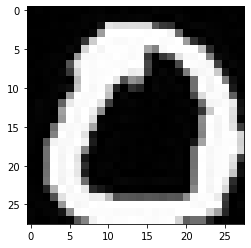

In [ ]:
#display an image from the dataset
show_img = X_train[0]

plt.imshow(show_img, cmap='gray')

Using the **matplotlib** python package 25 images of the training dataset are displayed.



In [ ]:
def plot_images(images):

    n_images = len(images)
    print(len(images)," images from training dataset are displayed")
    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))
    print(rows,cols)
    fig = plt.figure()
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i].view(28, 28).cpu().numpy(), cmap = 'bone')
        ax.axis('off')

25  images from training dataset are displayed
5 5


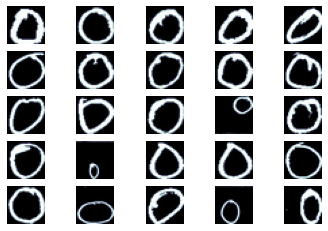

In [ ]:
N_IMAGES =25

images = [image for image, label in [train_dataset[i] for i in range(N_IMAGES)]] 

plot_images(images)


In [ ]:
#the GPU version currently available
print(torch.__version__)

print(torch.cuda.get_device_name())

1.7.0+cu101
Tesla T4


## Setting 1
- **totaldata:** 30,830
- **minibatch:** 32
- **iterations:**3,000
- **learning rate:** 0.001
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{30830}{32} = 3.11 \approx 3$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [ ]:
# Hyperparameters

batch_size = 32
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.001
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Now for testing purpose the training data is split into 90:10 ratio. The validation set/ training set which is of 10% should be created from the training set. Although there is a test set present in the NumtaDB dataset, the test set maybe not be same for the specific training set. That is why the validation set or training set is made form the training set.

We only need to shuffle our training set as it will be used for stochastic gradient descent and we want the each batch to be different between epochs.  It is always better to **shuffle the indices of the training set**.

`DataLoader`  is defined for each of the training//test sets. We can iterate over these and they will yield batches of images and labels which we can use to train our model.

In [ ]:

#batch size
batch_size = 32

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))# check the size of the training dataloader
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:868
Test dataloader:97


#### Step #1 : Design model using class

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.sigmoid(logits)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

####Step #2 : Construct loss and optimizer (select from PyTorch API)

We need Cross Entropy Loss to calculate our loss before we backpropagate and update our parameters.

`criterion = nn.CrossEntropyLoss() ` 

It does 2 things at the same time.

1. Computes softmax **([Logistic or Sigmoid]/softmax function)**
2. Computes Cross Entropy Loss

Sigmoid function is used as the activation function in this case as it is a multilabel problem. The probabilities produced by a sigmoid are independent, and are not constrained to sum to one. Sigmoid looks at each raw output value separately. Sigmoid function is applied to the raw output values to obtain the final probabilities and allow for more than one correct answer. It is used in binary classification problems. The following image shows the equation for sigmoid function:
<div align="center">
<img src="https://drive.google.com/uc?export=view&id=12fmPrpo-UdbQgk2P06fiT8nenLA1LGlH" width="200">
</div>


In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

3


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Iteration: 500. Loss: 0.6661770939826965. Accuracy: 55.27084009082063
Iteration: 1000. Loss: 0.707476794719696. Accuracy: 57.08725267596497
Iteration: 1500. Loss: 0.7276877760887146. Accuracy: 57.703535517353224
Iteration: 2000. Loss: 0.6918143630027771. Accuracy: 57.89815115147584
Iteration: 2500. Loss: 0.6808879375457764. Accuracy: 58.41712617580279


## Setting 2
- **totaldata:** 30,830
- **minibatch:** 32
- **iterations:**3,000
- **learning rate:** 0.099
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{30830}{32} = 3.11 \approx 3$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [ ]:
# Hyperparameters

batch_size = 32
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.099
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import numpy as np
#batch size
batch_size = 32

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:868
Test dataloader:97


In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.sigmoid(logits)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

3


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Iteration: 500. Loss: 0.9718437790870667. Accuracy: 51.34609146934804
Iteration: 1000. Loss: 1.1169027090072632. Accuracy: 52.93545248134934
Iteration: 1500. Loss: 0.8178377151489258. Accuracy: 57.15212455400584
Iteration: 2000. Loss: 0.6235624551773071. Accuracy: 57.11968861498541
Iteration: 2500. Loss: 0.8143820762634277. Accuracy: 57.93058709049627


## Setting 3
- **totaldata:** 30,830
- **minibatch:** 64
- **iterations:**3,000
- **learning rate:** 0.001
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{30830}{64} = 6.22 \approx 6$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.001
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import numpy as np
#batch size
batch_size = 64

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:434
Test dataloader:49


In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.sigmoid(logits)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

6


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Iteration: 500. Loss: 0.6821397542953491. Accuracy: 54.36263379824846
Iteration: 1000. Loss: 0.6863048076629639. Accuracy: 55.335711968861496
Iteration: 1500. Loss: 0.6810873746871948. Accuracy: 55.78981511514758
Iteration: 2000. Loss: 0.6701732873916626. Accuracy: 56.37366201751541
Iteration: 2500. Loss: 0.6591928005218506. Accuracy: 57.05481673694454


## Setting 4
- **totaldata:** 30,830
- **minibatch:** 100
- **iterations:**5,000
- **learning rate:** 0.001
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 5000 \div \frac{30830}{64} = 10.6 \approx 10$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [ ]:
# Hyperparameters

batch_size = 100
num_iters = 5000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.001
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import numpy as np
#batch size
batch_size = 64

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:434
Test dataloader:49


In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.sigmoid(logits)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

10


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Iteration: 500. Loss: 0.6737940907478333. Accuracy: 53.58417126175803
Iteration: 1000. Loss: 0.6787950992584229. Accuracy: 56.11417450535193
Iteration: 1500. Loss: 0.7080864310264587. Accuracy: 56.860201102821925
Iteration: 2000. Loss: 0.6894968748092651. Accuracy: 57.249432371067144
Iteration: 2500. Loss: 0.6654186844825745. Accuracy: 58.51443399286409
Iteration: 3000. Loss: 0.6734084486961365. Accuracy: 58.67661368796627
Iteration: 3500. Loss: 0.6786548495292664. Accuracy: 59.098280895231916
Iteration: 4000. Loss: 0.6666333675384521. Accuracy: 59.19558871229322


##**Result Analysis**

The hyperparameters are varied and tried out for different possibilities to get the best result. The following comparisions are seen while testing the dataset.

1. **Batch size**: A hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.
2. **Epoch**: A hyperparameter that controls the number of complete passes through the training dataset. 
1. **Learning rate**: The amount with which the weights are updated to help the gradient descent converge.
1. **Iteration:** The number of batches needed to complete one epoch.
2. **Accuracy:** An evaluation metric used to predict the correctness of a machine learning model.





|   Mini-Batch Size   | Iterations   | Learning Rate| Accuracy     |Num of Epochs    |
| :-------------:| :----------: | :-----------:|:-----------:|:-----------:|
|      32        | 3000        | 0.001       |58.41%     |3            |
| 32            | 3000        | 0.099      |57.93%       |3            |
|64              |3000         | 0.001        |57.04%       |6            |
|100             |6000        | 0.001       |**59.19%**       |10           |


By varying the different outputs we can see the change in accuracy although it doesnt make a significant change for this problem. With batch 100 and a higher iteration of 6000 the best result is computed which is 59%